In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Brownian Motion

$$\begin{align}
B_0 &= 0 \\
B_{n\Delta t} &= B_{(t-1)\Delta t} + \sqrt{\Delta t} z_n
\end{align}$$

where $z_n \sim \mathcal{N}(0,1)$.

In [28]:
# Alternatively we can drop the T variable and merely stipulate an increment + number of points to compute
def BM_path(T, time_points):
    increment = T/time_points
    trajectory = [0]
    for i in range(time_points):
        realization = trajectory[-1]+np.sqrt(increment)*np.random.normal()
        trajectory.append(realization)
    return trajectory

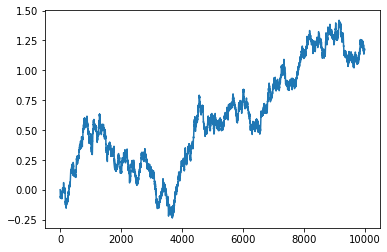

In [29]:
# to-do: x-axis should be scaled to end with value T
plt.plot(BM_path(1,10000))

# Poisson process

The random numbers with exponential distribution can be computed using `numpy.random.exponential`:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

The exponential function above uses a different parameter $\beta = 1/\lambda$.

In [50]:
def poisson_path(intensity,T,time_points):
    increment = T/time_points
    beta = 1/intensity
    s_trajectory = [0]
    for i in range(time_points):
        realization = s_trajectory[-1]+np.random.exponential(beta)
        s_trajectory.append(realization)
    
    poisson_trajectory = [0]
    for i in range(time_points):
        sup_set = []
        for k in range(0,len(s_trajectory)):
            if s_trajectory[k] <= i*increment:
                sup_set.append(k)
        realization = max(sup_set)
        poisson_trajectory.append(realization)
    
    return poisson_trajectory

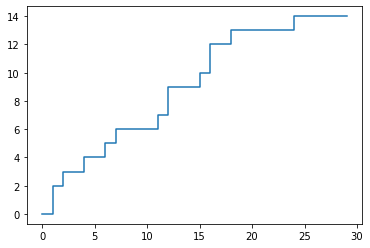

In [56]:
plt.step([i for i in range(0,30)],poisson_path(0.5, 29, 29))